In [ ]:
# 패키지 임포트
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 데이터 세트 준비
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 데이터 세트 셰이프 확인
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


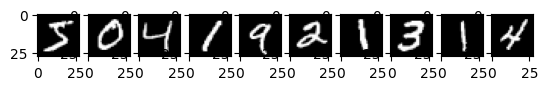

In [ ]:
# 데이터 세트 이미지 확인
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i], 'gray')
plt.show()

In [ ]:
# 데이터 세트 라벨 확인
print(train_labels[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [ ]:
# 데이터 세트 이미지 전처리
train_images = train_images.reshape((train_images.shape[0], 784))
test_images = test_images.reshape((test_images.shape[0], 784))

# 데이터 세트 이미지 전처리 후 셰이프 확인
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [ ]:
# 데이터 세트 라벨 전처리
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 데이터 세트 라벨 전처리 후 셰이프 확인
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [ ]:
# 모델 생성
model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(784,))) # 입력 레이어
model.add(Dense(128, activation='sigmoid')) # 히든 레이어
model.add(Dropout(rate=0.5)) # 드롭아웃
model.add(Dense(10, activation='softmax')) # 출력 레이어

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1), metrics=['acc'])

In [ ]:
# 실행시간 측정
import time
import psutil

# 실행 시간 측정 시작
start_time = time.time()

# CPU 및 메모리 사용량 측정 시작
cpu_before = psutil.cpu_percent(interval=None)
memory_before = psutil.virtual_memory().percent


In [ ]:
# 학습
history = model.fit(train_images, train_labels, batch_size=500,
    epochs=5, validation_split=0.2)

Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.2876 - loss: 2.0754 - val_acc: 0.8409 - val_loss: 0.9935
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.7071 - loss: 1.0387 - val_acc: 0.8890 - val_loss: 0.5801
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - acc: 0.8062 - loss: 0.7066 - val_acc: 0.8975 - val_loss: 0.4404
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - acc: 0.8460 - loss: 0.5658 - val_acc: 0.9073 - val_loss: 0.3703
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8629 - loss: 0.4930 - val_acc: 0.9132 - val_loss: 0.3274


In [ ]:
# CPU 및 메모리 사용량 측정
# 학습 완료 후 실행 시간 측정 종료
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")

# CPU 및 메모리 사용량 측정 종료
cpu_after = psutil.cpu_percent(interval=None)
memory_after = psutil.virtual_memory().percent

cpu_efficiency = cpu_after - cpu_before
memory_efficiency = memory_after - memory_before

print(f"CPU Efficiency: {cpu_efficiency}%")
print(f"Memory Efficiency: {memory_efficiency}%")

Execution Time: 26.98120141029358 seconds
CPU Efficiency: 19.099999999999998%
Memory Efficiency: 0.7000000000000011%


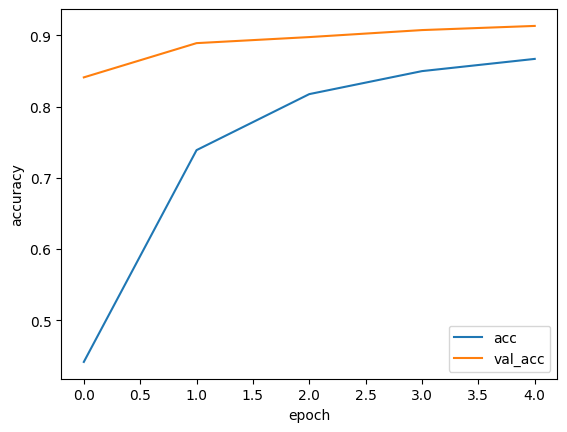

In [ ]:
# 그래프 표시
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [ ]:
# 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss, test_acc ))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.8982 - loss: 0.3737
loss: 0.333
acc: 0.913


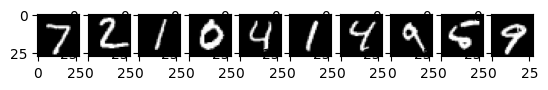

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[7 2 1 0 4 1 4 9 6 9]


In [ ]:
# 추론할 이미지 표시
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i].reshape((28, 28)), 'gray')
plt.show()

# 추론한 라벨 표시
test_predictions = model.predict(test_images[0:10])
test_predictions = np.argmax(test_predictions, axis=1)
print(test_predictions)